In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
df=pd.read_csv("general_data.csv")

In [3]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
df.tail()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3
4409,4410,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,Male,...,NaN,6,21,3,9,1.0,3.0,NaN,4,3


In [5]:
df.shape

(4410, 29)

In [6]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [7]:
df.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [9]:
working_exri=df["TotalWorkingYears"].mean()
df["TotalWorkingYears"].fillna(working_exri,inplace=True)

In [10]:
env_sat=df["EnvironmentSatisfaction"].mean()
df["EnvironmentSatisfaction"].fillna(env_sat,inplace=True)

In [11]:
job_sat=df["JobSatisfaction"].mean()
df["JobSatisfaction"].fillna(job_sat,inplace=True)

In [12]:
workLife=df["WorkLifeBalance"].mean()
df["WorkLifeBalance"].fillna(workLife,inplace=True)

In [13]:
no_com=df["NumCompaniesWorked"].mean()
df["NumCompaniesWorked"].fillna(no_com,inplace=True)

In [14]:
df.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [15]:
df.nunique()

EmployeeID                 4410
Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           11
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            41
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       5
JobSatisfaction               5
WorkLifeBalance               5
JobInvolvement                4
PerformanceRating             2
dtype: int64

In [16]:
df.drop_duplicates()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.000000,6,1,0,0,3.0,4.0,2.000000,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.000000,3,5,1,4,3.0,2.0,4.000000,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.000000,2,5,0,3,2.0,2.0,1.000000,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.000000,5,8,7,5,4.0,4.0,3.000000,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.000000,2,6,0,4,4.0,1.0,3.000000,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.000000,5,3,0,2,4.0,1.0,3.000000,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.000000,2,3,0,2,4.0,4.0,3.000000,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.000000,4,4,1,2,1.0,3.0,3.000000,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.000000,2,9,7,8,4.0,1.0,3.000000,2,3


In [17]:
input=np.asarray(df[["TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion"]])
target=np.asarray(df["MonthlyIncome"])


In [18]:
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.3,random_state=0)

In [19]:
x_train

array([[ 4.,  2.,  3.,  0.],
       [19.,  0.,  5.,  0.],
       [26.,  2., 26.,  3.],
       ...,
       [ 8.,  3.,  2.,  2.],
       [10.,  2., 10.,  0.],
       [23.,  6.,  1.,  0.]])

In [20]:
y_train

array([18590, 28370, 63470, ..., 29770, 70940, 45910], dtype=int64)

In [21]:
r2 = LinearRegression()
r2.fit(x_train, y_train)

LinearRegression()

In [22]:
r2.score(x_test,y_test)

0.013831640495834185

In [23]:
name_of_depts=np.array(df['Department'])
dept=[]
for i in name_of_depts:
    if i not in dept:
        dept.append(i)
print("Deparments are :" )
for d in dept:
    print(d)    

Deparments are :
Sales
Research & Development
Human Resources


In [24]:
print("Dept. wise no of Employee: ")
df.groupby(["Department"]).Department.count()

Dept. wise no of Employee: 


Department
Human Resources            189
Research & Development    2883
Sales                     1338
Name: Department, dtype: int64

In [25]:
print("Avg. distance from home is :",df["DistanceFromHome"].mean(),"KM")

Avg. distance from home is : 9.19251700680272 KM


In [26]:
print("Most number of  distance from home is :",df["DistanceFromHome"].mode()[0],"KM")

Most number of  distance from home is : 2 KM


In [27]:
print("Max. distance from home is :",df["DistanceFromHome"].max(),"KM")

Max. distance from home is : 29 KM


In [28]:
print("Min. distance from home is :",df["DistanceFromHome"].min(),"KM")

Min. distance from home is : 1 KM


In [29]:
print("Monthly avg income is: ",df["MonthlyIncome"].mean(),"/-")

Monthly avg income is:  65029.31292517007 /-


In [30]:
print("Most number of monthly  income is: ",df["MonthlyIncome"].mode()[0],"/-")

Most number of monthly  income is:  23420 /-


In [31]:
print("Maximum income is: ",df["MonthlyIncome"].max(),"/-")

Maximum income is:  199990 /-


In [32]:
print("Minimum income is: ",df["MonthlyIncome"].min(),"/-")

Minimum income is:  10090 /-


In [33]:
gender=np.array(df["Gender"])
female=[]
male=[]
for i in gender:
    if i=="Male":
        male.append(i)
    elif i=="Female":
        female.append(i)
print("Total no of Female is:",len(female),"and","Male is:",len(male))        

Total no of Female is: 1764 and Male is: 2646


In [34]:
print("Avg. working years is: ",df["TotalWorkingYears"].mean())

Avg. working years is:  11.279936378095885


In [35]:
print("Most number of working years is: ",df["TotalWorkingYears"].mode()[0])

Most number of working years is:  10.0


In [36]:
print("Maximum  working years is: ",df["TotalWorkingYears"].max())

Maximum  working years is:  40.0


In [37]:
print("Minimum  working years is: ",df["TotalWorkingYears"].min())

Minimum  working years is:  0.0


In [73]:
max_working_years=df["YearsAtCompany"].max()
min_working_years=df["YearsAtCompany"].min()

print(min_working_years)

0


In [74]:
df[df["EmployeeID"]==max_working_years]

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
39,40,35,No,Travel_Rarely,Sales,20,2,Life Sciences,1,Male,...,12.0,2,11,6,9,3.0,2.0,2.0,2,3


In [40]:
print("Avg. performance Rating is: ",df["PerformanceRating"].mean())

Avg. performance Rating is:  3.1537414965986397


In [41]:
print("Maximum Performance rating is:",df["PerformanceRating"].max())

Maximum Performance rating is: 4


In [42]:
print("Maximum Performance rating is:",df["PerformanceRating"].min())

Maximum Performance rating is: 3


In [43]:
df.skew()

EmployeeID                 0.000000
Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
EmployeeCount              0.000000
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.028984
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          1.117972
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
EnvironmentSatisfaction   -0.324214
JobSatisfaction           -0.329369
WorkLifeBalance           -0.559455
JobInvolvement            -0.498080
PerformanceRating          1.920574
dtype: float64

In [44]:
df.corr()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,1.000000,0.008649,-0.001097,-0.009680,NaN,-0.003303,0.007338,-0.001114,-0.004456,NaN,...,-0.001061,-0.010191,0.004086,0.000256,0.008579,0.000795,-0.001051,-0.001717,0.008591,-0.006892
Age,0.008649,1.000000,0.006963,-0.035706,NaN,-0.002884,-0.044314,0.298528,-0.033137,NaN,...,0.680419,-0.027308,0.311309,0.216513,0.202089,0.010073,-0.003081,-0.021191,0.018196,-0.025563
DistanceFromHome,-0.001097,0.006963,1.000000,-0.008638,NaN,-0.037329,-0.021607,-0.013818,0.038125,NaN,...,0.009361,-0.009001,0.031684,0.002290,0.021584,0.020109,-0.011119,0.007961,-0.001837,0.036418
Education,-0.009680,-0.035706,-0.008638,1.000000,NaN,0.045746,0.006410,-0.016219,-0.040531,NaN,...,-0.010712,0.010472,0.006080,0.022490,0.005358,-0.045317,-0.004160,-0.006388,-0.018279,-0.035591
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,-0.003303,-0.002884,-0.037329,0.045746,NaN,1.000000,0.047316,-0.009844,0.010973,NaN,...,-0.036934,-0.032500,-0.064219,-0.060811,-0.055251,-0.024409,-0.018230,-0.027538,-0.012630,-0.002474
MonthlyIncome,0.007338,-0.044314,-0.021607,0.006410,NaN,0.047316,1.000000,-0.020710,0.004325,NaN,...,-0.033758,0.050112,0.000995,0.065219,0.024304,-0.005981,0.005055,0.003553,0.023346,0.016093
NumCompaniesWorked,-0.001114,0.298528,-0.013818,-0.016219,NaN,-0.009844,-0.020710,1.000000,0.030825,NaN,...,0.238052,-0.032239,-0.117820,-0.036618,-0.109480,0.012936,-0.055936,-0.008667,0.027921,0.017802
PercentSalaryHike,-0.004456,-0.033137,0.038125,-0.040531,NaN,0.010973,0.004325,0.030825,1.000000,NaN,...,-0.018717,-0.037392,-0.029707,-0.029542,-0.040864,0.000838,0.030756,-0.040409,-0.004658,0.773550
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.cov()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,1.621042e+06,100.573146,-11.316512,-12.619188,0.0,-4.653436,4.397308e+05,-3.535604,-20.761851,0.0,...,-10.502761,-16.724541,31.864368,1.050578,38.964278,1.102991,-1.469620,-1.537154,7.781016,-3.165344
Age,1.005731e+02,83.417192,0.515465,-0.333921,0.0,-0.029148,-1.905030e+04,6.798631,-1.107417,0.0,...,48.312991,-0.321485,17.415455,6.370852,6.584344,0.100247,-0.030914,-0.136097,0.118226,-0.084224
DistanceFromHome,-1.131651e+01,0.515465,65.691439,-0.071688,0.0,-0.334836,-8.242961e+03,-0.279254,1.130668,0.0,...,0.589860,-0.094040,1.572935,0.059786,0.624056,0.177592,-0.099016,0.045372,-0.010595,0.106481
Education,-1.261919e+01,-0.333921,-0.071688,1.048438,0.0,0.051838,3.089354e+02,-0.041410,-0.151858,0.0,...,-0.085268,0.013821,0.038134,0.074189,0.019569,-0.050561,-0.004680,-0.004599,-0.013315,-0.013147
EmployeeCount,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JobLevel,-4.653436e+00,-0.029148,-0.334836,0.051838,0.0,1.224760,2.464705e+03,-0.027166,0.044435,0.0,...,-0.317773,-0.046362,-0.435315,-0.216817,-0.218127,-0.029435,-0.022167,-0.021430,-0.009943,-0.000988
MonthlyIncome,4.397308e+05,-19050.304118,-8242.961368,308.935397,0.0,2464.704866,2.215480e+09,-2430.674538,744.843470,0.0,...,-12353.013895,3040.354261,286.846163,9889.970265,4080.928347,-306.741262,261.415765,117.595883,781.726399,273.262834
NumCompaniesWorked,-3.535604e+00,6.798631,-0.279254,-0.041410,0.0,-0.027166,-2.430675e+03,6.217526,0.281249,0.0,...,4.614666,-0.103619,-1.799469,-0.294163,-0.973833,0.035149,-0.153249,-0.015196,0.049529,0.016013
PercentSalaryHike,-2.076185e+01,-1.107417,1.130668,-0.151858,0.0,0.044435,7.448435e+02,0.281249,13.389068,0.0,...,-0.532452,-0.176360,-0.665807,-0.348262,-0.533402,0.003341,0.123653,-0.103976,-0.012125,1.021080
StandardHours,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
col=df["MonthlyIncome"]
l=[]
for i in col:
    l.append(i)
print("Variance is using built-in-function: ",statistics.variance(l))
print("Stranderd daviation using in build function is: ",statistics.stdev(l))

Variance is using built-in-function:  2215480270.2241244
Stranderd daviation using in build function is:  47068.88855947339


In [47]:
l.sort()
q1=np.percentile(l,25)
print("q1=",q1)
q3=np.percentile(l,75)
print("q3=",q3)
iqr1=q3-q1
print("IQR=",iqr1)

q1= 29110.0
q3= 83800.0
IQR= 54690.0


In [48]:
col=df["YearsAtCompany"]
l1=[]
for i in col:
    l1.append(i)
print("Variance is using built-in-function: ",statistics.variance(l1))
print("Stranderd daviation using in build function is: ",statistics.stdev(l1))

Variance is using built-in-function:  37.517284219199134
Stranderd daviation using in build function is:  6.125135444967657


In [49]:
l1.sort()
q1=np.percentile(l1,25)
print("q1=",q1)
q3=np.percentile(l1,75)
print("q3=",q3)
iqr1=q3-q1
print("IQR=",iqr1)

q1= 3.0
q3= 9.0
IQR= 6.0


<AxesSubplot:xlabel='PerformanceRating'>

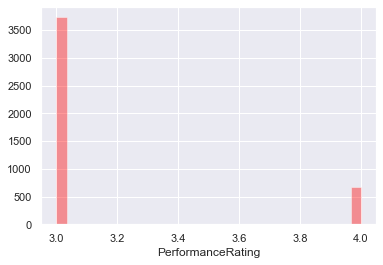

In [50]:
sns.distplot(df['PerformanceRating'], kde = False, color ='red', bins = 30)


<AxesSubplot:xlabel='Age'>

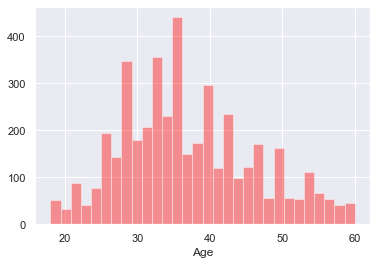

In [51]:
sns.distplot(df['Age'], kde = False, color ='red', bins = 30)


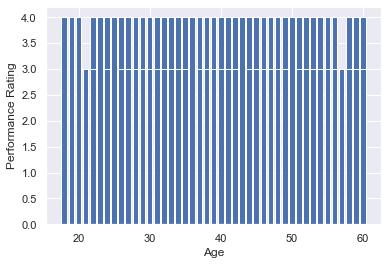

In [52]:
x=np.array(df["Age"])
y=np.array(df["PerformanceRating"])
plt.xlabel("Age")
plt.ylabel("Performance Rating")
plt.bar(x,y)
plt.show()

<AxesSubplot:>

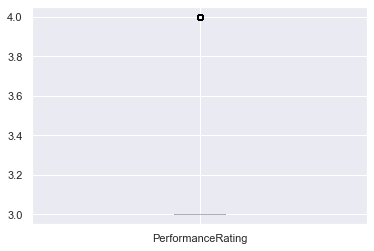

In [53]:
df.boxplot( column=['PerformanceRating'], grid = True)


<AxesSubplot:>

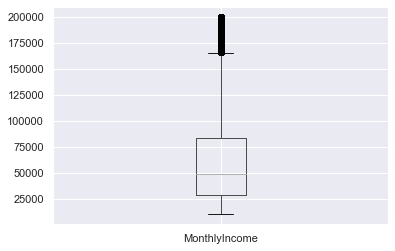

In [54]:
df.boxplot( column=['MonthlyIncome'], grid = True)


<AxesSubplot:>

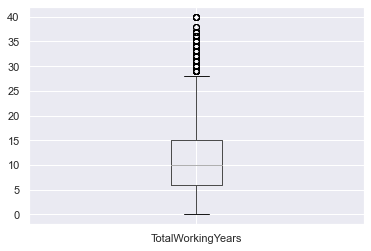

In [55]:
df.boxplot( column=['TotalWorkingYears'], grid = True)


<AxesSubplot:>

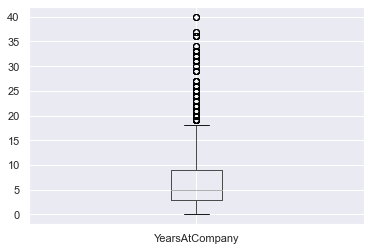

In [56]:
df.boxplot(column=['YearsAtCompany'])

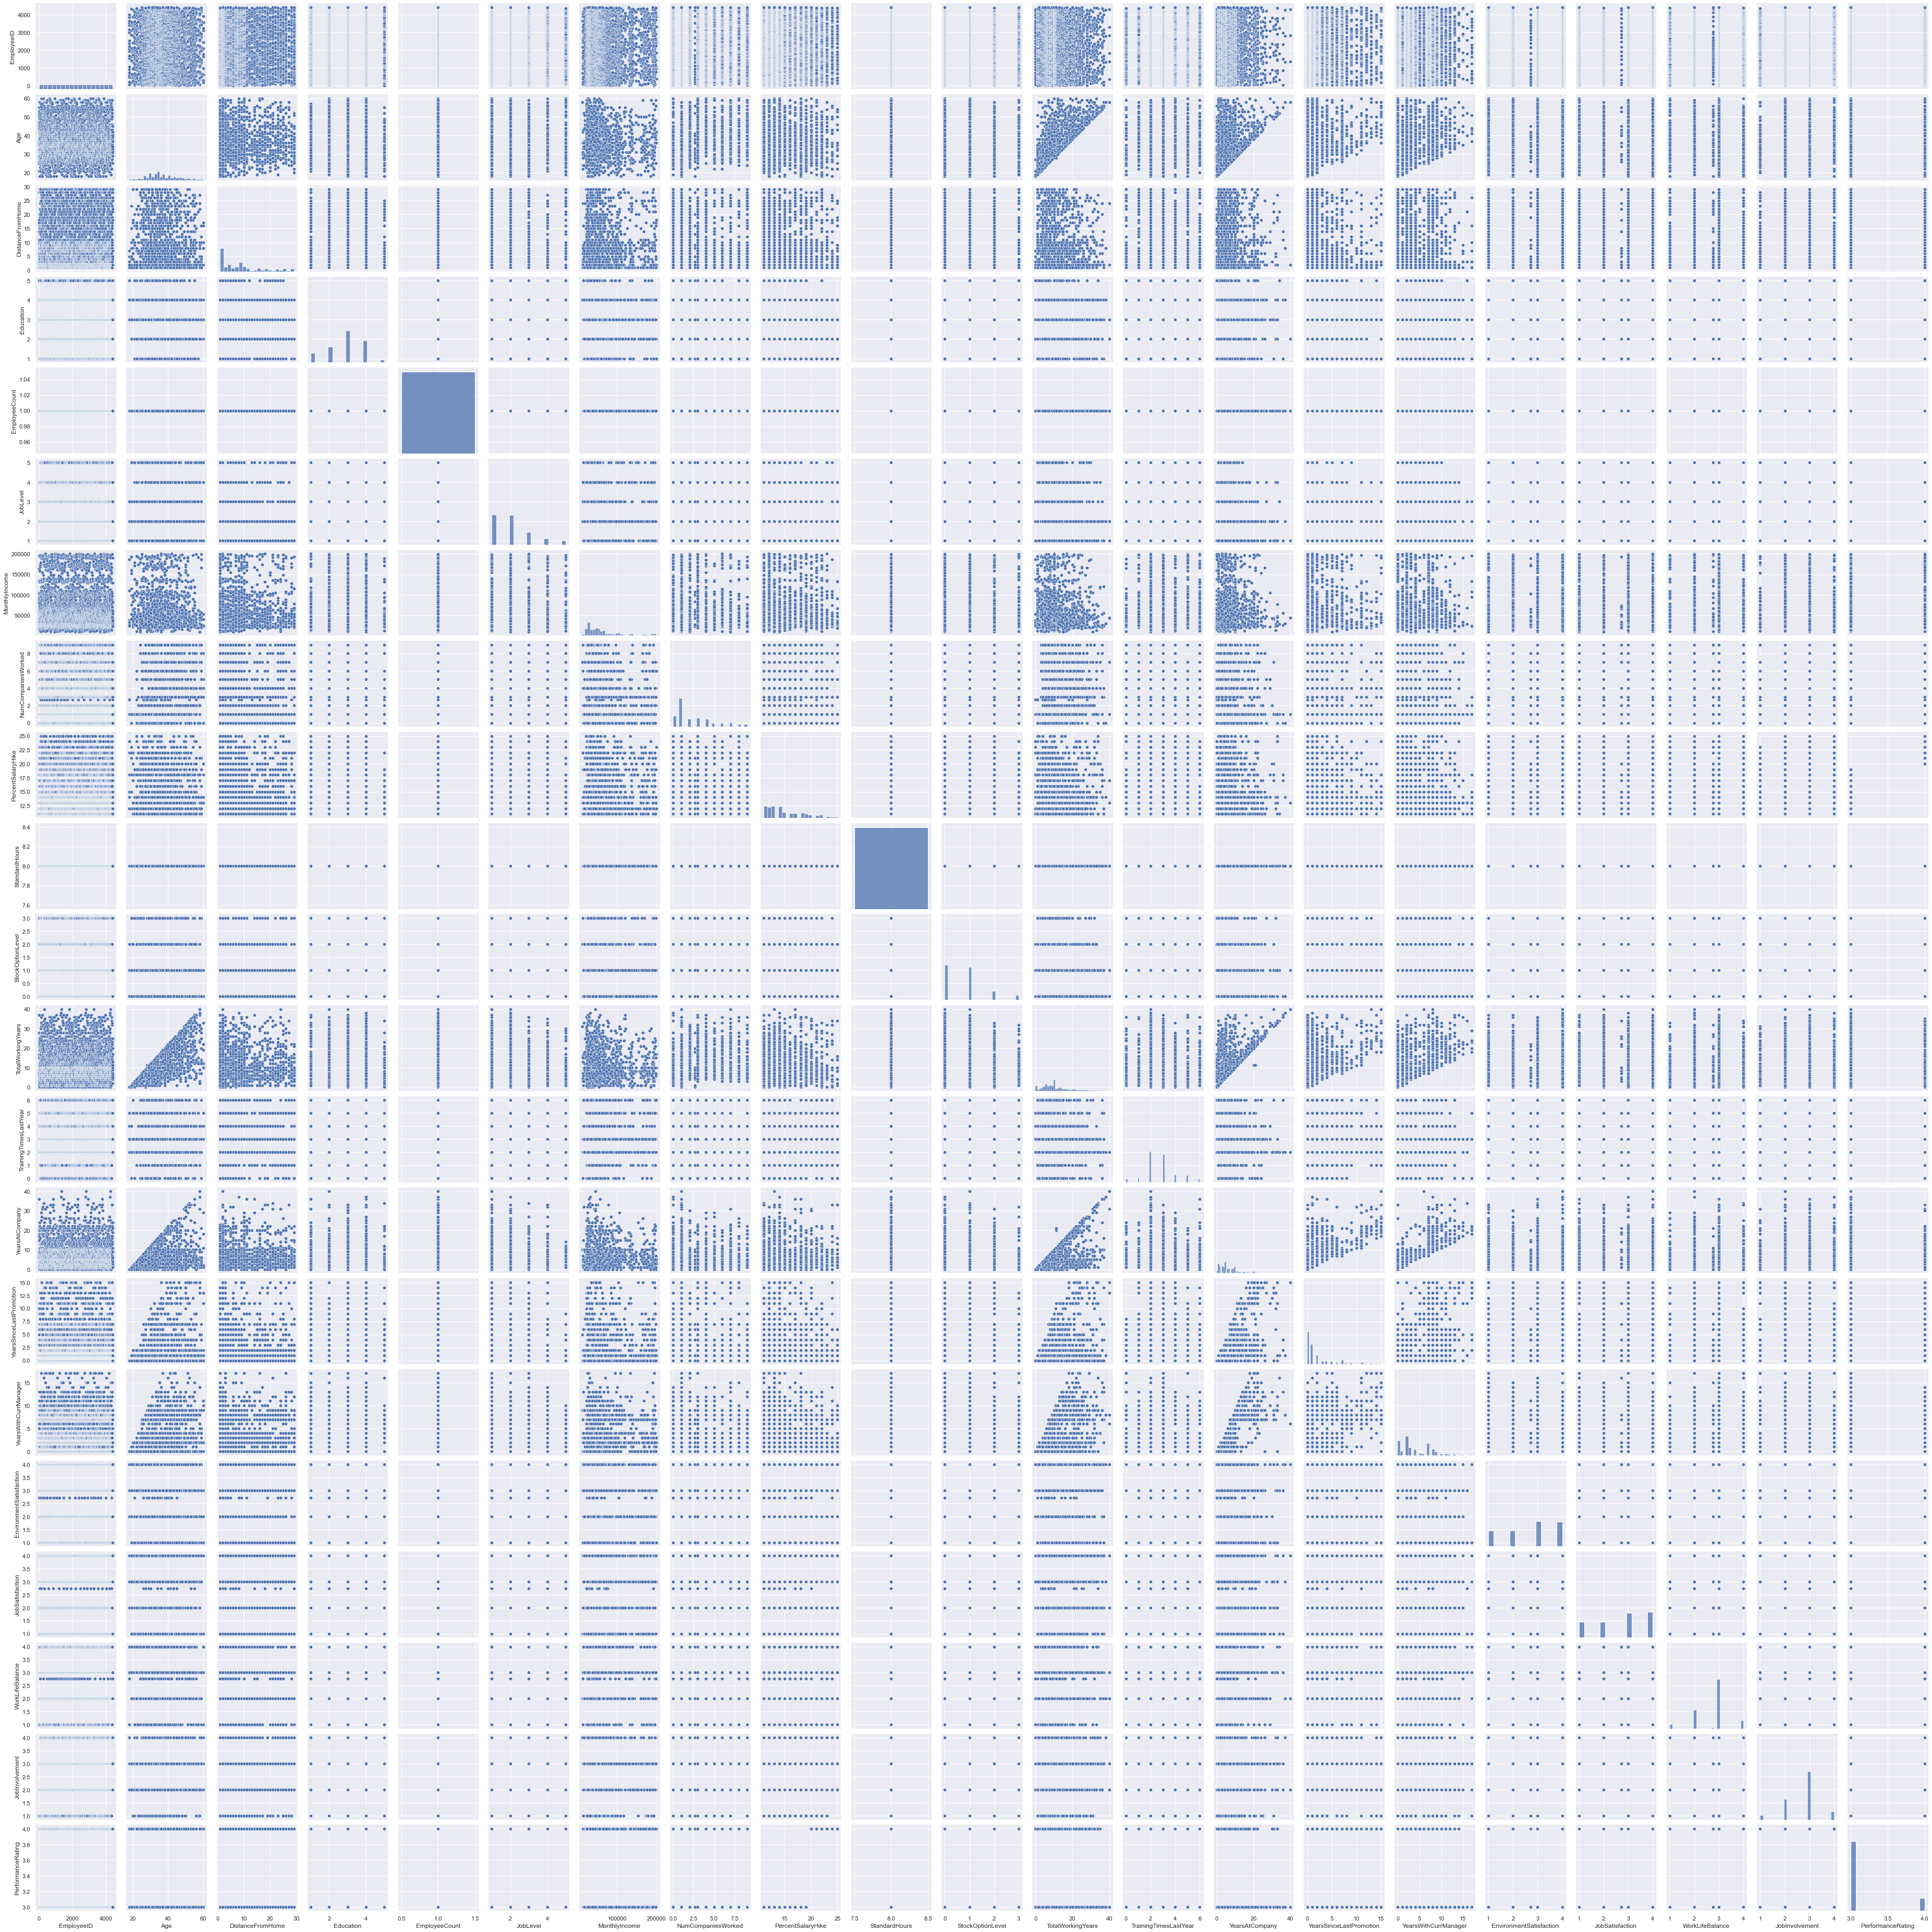

In [57]:
sns.pairplot(df, palette ='coolwarm')

In [58]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

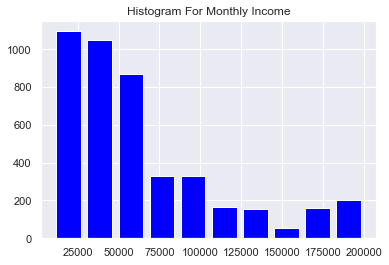

In [59]:
plt.hist(df['MonthlyIncome'], rwidth=0.8, color='blue')
plt.title("Histogram For Monthly Income")
plt.show()

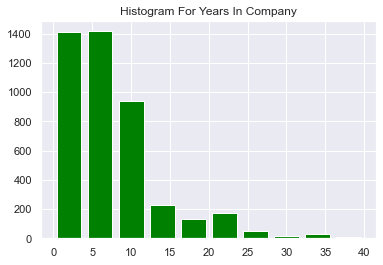

In [60]:
plt.hist(df['YearsAtCompany'], rwidth=0.8, color='green')
plt.title("Histogram For Years In Company")
plt.show()

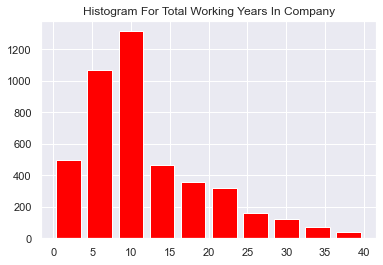

In [61]:
plt.hist(df['TotalWorkingYears'], rwidth=0.8, color='red')
plt.title("Histogram For Total Working Years In Company")
plt.show()

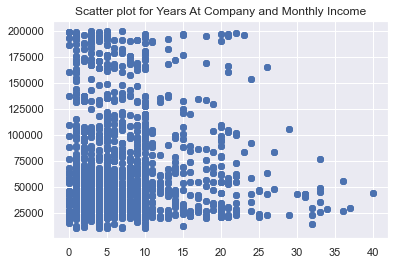

In [62]:
x=np.array(df["YearsAtCompany"])
y=np.array(df["MonthlyIncome"])
plt.title("Scatter plot for Years At Company and Monthly Income")
plt.scatter(x,y)
plt.show()

In [63]:
df.columns


Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [67]:
df1=df[df.Attrition=='Yes']

In [71]:
df1.shape
df1.to_csv("Attrition_yes.csv")

In [70]:
df2=df[df.Attrition=='No']
df2.shape

(3699, 29)

In [72]:
df2.to_csv("Attrition_no.csv")